<div style="direction:rtl;text-align:center"><img src="https://dl.mohammadkh.ir/logo.png" alt="Mohammadkh.ir" style="width: 250px;"/></div>
<h1><div style="direction:rtl;text-align:center">Clustering</div></h1>

### start

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
with open('../__data/Online Retail.pickle','rb') as f :
    data = pickle.load(f)
# del null    
data = data[data['CustomerID'].notnull()]
# fix time
data['InvoiceDay'] = data['InvoiceDate'].apply(lambda x: dt.datetime(x.year, x.month, x.day))
# cal last shoping time
pin_date = max(data['InvoiceDay']) + dt.timedelta(1) # max day + 1 day = last day
# cal sum factor
data['TotalSum'] = data['Quantity'] * data['UnitPrice']


# creat rfm data
# group CustomerID -- last shop , count shop , sum price shop
rfm = data.groupby('CustomerID').agg({
    'InvoiceDay': lambda x: (pin_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'
})

# rename columes
rfm.rename(columns= {
    'InvoiceDay': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalSum': 'Monetary'
}, inplace=True)

# scale
r_labels = range(4, 0, -1)
r_groups = pd.qcut(rfm['Recency'], q=4, labels=r_labels)
rfm['R'] = r_groups.values

f_labels = range(1, 5)
f_groups = pd.qcut(rfm['Frequency'], q=4, labels=f_labels)
rfm['F'] = f_groups.values

m_labels = range(1, 5)
m_groups = pd.qcut(rfm['Monetary'], q=4, labels=m_labels)
rfm['M'] = m_groups.values

# data for clustering
X = rfm[['R', 'F', 'M']]

rfm.head(2)

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.0,1,1,1
12347.0,3,182,4310.0,4,4,4


# clustering

### KMeans

In [3]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [4]:
np.unique(kmeans.labels_)

array([0, 1])

In [5]:
#range -1 1 --> 0 ham poshani
silhouette_score(X, kmeans.labels_)

0.4532234447516019

In [6]:
kmeans.inertia_

7612.991565595297

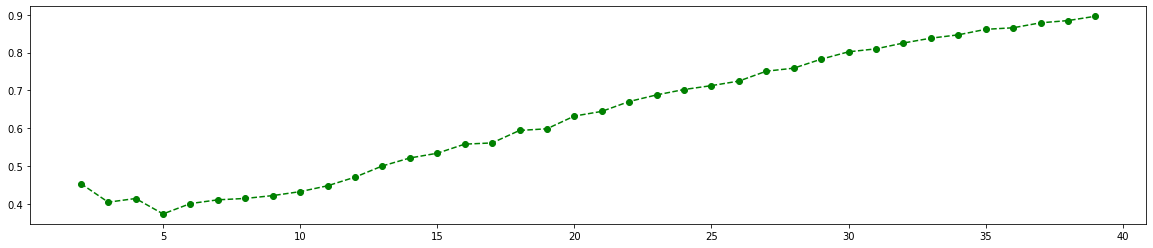

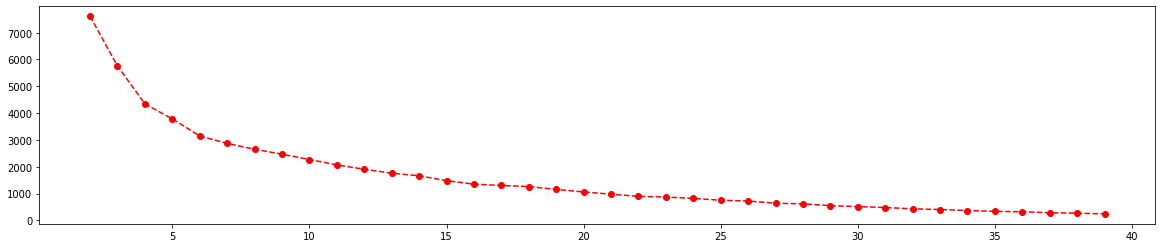

In [7]:
wcss = {}
silhouette_score_ = {}
for k in range(2, 40):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss[k] = kmeans.inertia_
    silhouette_score_[k] = (silhouette_score(X, kmeans.labels_))
    
plt.figure(figsize=(20,4))
plt.plot(list(silhouette_score_.keys()), list(silhouette_score_.values()), 'go--')
plt.figure(figsize=(20,4))
plt.plot(list(wcss.keys()), list(wcss.values()), 'ro--')

### DBSCAN

In [8]:
dbscan = DBSCAN(eps=0.9, min_samples=1)
dbscan.fit(X)

DBSCAN(eps=0.9, min_samples=1)

In [9]:
np.unique(dbscan.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], dtype=int64)

In [10]:
silhouette_score(X, dbscan.labels_)

0.9995425434583715

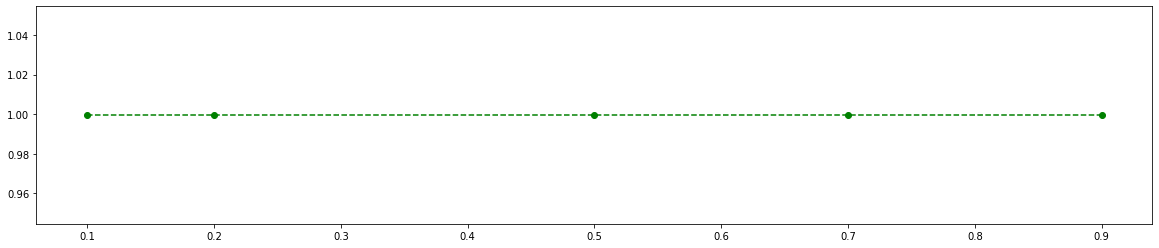

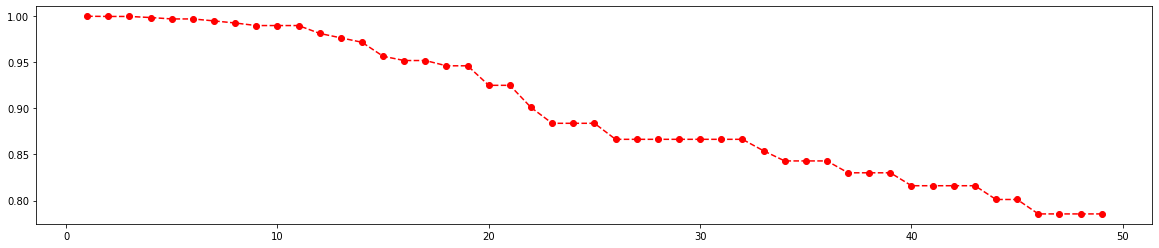

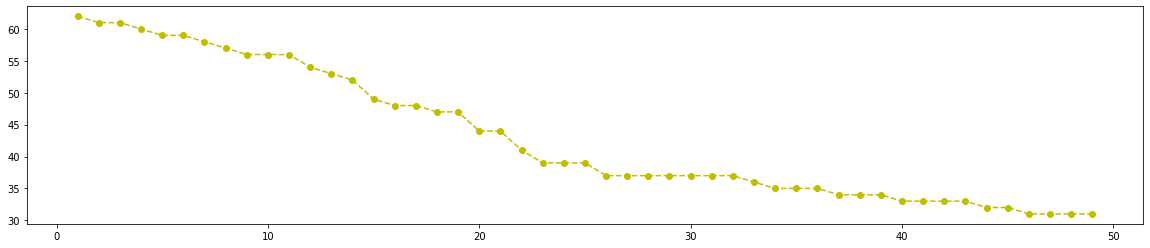

In [23]:
silhouette_score_ = {}
for k in [0.1,0.2,0.5,0.7,0.9,1,1.1,1.3,1.5,2,4,10]:
    dbscan = DBSCAN(eps=k, min_samples=1)
    dbscan.fit(X)
    if len(np.unique(dbscan.labels_)) > 1:
        silhouette_score_[k] = (silhouette_score(X, dbscan.labels_))
    
plt.figure(figsize=(20,4))
plt.plot(list(silhouette_score_.keys()), list(silhouette_score_.values()), 'go--')

count = {} # count lenlabels
silhouette_score_ = {}
for k in range(1, 50):
    dbscan = DBSCAN(eps=0.9, min_samples=k)
    dbscan.fit(X)
    if len(np.unique(dbscan.labels_)) > 1:
        silhouette_score_[k] = (silhouette_score(X, dbscan.labels_))
        count[k] = len(np.unique(dbscan.labels_))
    
plt.figure(figsize=(20,4))
plt.plot(list(silhouette_score_.keys()), list(silhouette_score_.values()), 'ro--')
plt.figure(figsize=(20,4))
plt.plot(list(count.keys()), list(count.values()), 'yo--')

<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:left"><strong>Clustering</strong><br>MohammadReza <strong>Khajedaloi</strong><br><br>
</div>
<div style="direction:rtl;text-align:right">
<a href="http://mohammadkh.ir/">WebSite</a> - <a href="https://github.com/khajedaloi/">GitHub</a> - <a href="https://www.linkedin.com/in/mohammad-kh/">Linkedin</a>
</div>
</div>